<a href="https://colab.research.google.com/github/chinmayAmbasht/phys-246-fa23/blob/main/Climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate Dynamics

In [ ]:
!pip install climlab
!wget https://clark.physics.illinois.edu/temp.data


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for climlab: filename=climlab-0.8.2-py3-none-any.whl size=171440 sha256=329d56074d25a947e28c1fc6bf2ef51d22e1fb77518e87af3f8d60e0e34e7293
  Stored in directory: /root/.cache/pip/wheels/b8/de/bb/3a39e440567925a2df52134308d3cc424f69bbe4e854a3de35
Successfully built climlab
--2023-12-07 18:40:51--  https://clark.physics.illinois.edu/temp.data
Resolving clark.physics.illinois.edu (clark.physics.illinois.edu)... 18.220.149.166
Connecting to clark.physics.illinois.edu (clark.physics.illinois.edu)|18.220.149.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17595 (17K)
Saving to: ‘temp.data’

temp.data           100%[===================>]  17.18K  --.-KB/s    in 0.03s   

2023-12-07 18:40:51 (663 KB/s) - ‘temp.data’ saved [17595/17595]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from climlab import constants as const
from climlab.solar.insolation import daily_insolation
from climlab.utils import legendre
import climlab
import scipy
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['resetMe','np','plt','random']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    return
tempData=np.loadtxt("temp.data")
tempData[:,1]=tempData[:,1]+14.2
import datetime;datetime.datetime.now()


/usr/local/lib/python3.10/dist-packages/climlab/radiation/cam3.py:46: UserWarning: Cannot import and initialize compiled Fortran extension, CAM3 module will not be functional.
  warnings.warn('Cannot import and initialize compiled Fortran extension, CAM3 module will not be functional.')
/usr/local/lib/python3.10/dist-packages/climlab/radiation/rrtm/rrtmg_lw.py:19: UserWarning: Cannot import and initialize compiled Fortran extension, RRTMG_LW module will not be functional.
  warnings.warn('Cannot import and initialize compiled Fortran extension, RRTMG_LW module will not be functional.')
/usr/local/lib/python3.10/dist-packages/climlab/radiation/rrtm/rrtmg_sw.py:19: UserWarning: Cannot import and initialize compiled Fortran extension, RRTMG_SW module will not be functional.
  warnings.warn('Cannot import and initialize compiled Fortran extension, RRTMG_SW module will not be functional.')
/usr/local/lib/python3.10/dist-packages/climlab/convection/akmaev_adjustment.py:142: NumbaDeprecationW

datetime.datetime(2023, 12, 7, 18, 40, 54, 120217)

## Exercise 1: Climate and Global Warming

### a. The temperature of the dark airless Earth

Our goal is to start understanding something about the climate.  We first want two functions:

```
def IncomingRadiationPerSquareMeter():
  ...
  ...
  return ...
```

which returns the incoming radiation to the Earth and

```
def OutgoingRadiationPerSquareMeter():
  ...
  ...
  return ...
```

which returns the outgoing radiation.   

We are going to iteratively improve upon these functions to add more realism eventually ending up with a one-dimensional representation of the Earth.  

Let us begin, though, with the simplest thing we can do.   The sun is outputting a certain amount of Energy per second.  By the time it has spread out to the orbit of the Earth, it is a flux of
* $S=1367.6$ Watts/$\textrm{m}^2$

From the Sun's point of view, the earth is a disc (circle) that is of area $\pi R^2$ where $R$ is the radius of the Earth.

From this, we can compute the amount of radiation that is hitting Earth. That radiation, though, is split out over the entire surface of the Earth - an area of $4\pi R^2$.

Using this information you should be able to write a function `IncomingRadiationPerSquareMeter()` which specifies how much radiation hits the Earth. Notice that this doesn't depend on the radius of the Earth $R$.


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
## Answer here
def IncomingRadiationPerSquareMeter():
  S = 1367.6
  return S / 4

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

To get an estimate of the outgoing radiation, we can use the Stefan-Boltzmann law.   This law tell us that a blackbody (like the Earth) radiates at $\sigma T^4$ where
* $\sigma =  5.67 \times 10^{-8}$ W/ ($m^2$ $K^4$)

We can now right the function `OutgoingRadiationPerSquareMeter(T)` which takes the temperature $T$.  


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### Answer here
def OutgoingRadiationPerSquareMeter(T):
  sigma = 5.67 * 10**-8
  return sigma * T**4

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

Now we need to find the temperature at which the incoming radiation and the outgoing radiation match.

Do this in two ways. First graph the two functions you've written as a function of temperature and determine at temperature $T$ the two match.

Secondly, let's just call some optimization.  Define a cost function `diff(T)` which gives the absolute value of the difference between the incoming and outgoing radiation.  Let's then just minimize this by calling
`opt=scipy.optimize.minimize(diff,[10],method='COBYLA',bounds=[(0,300)])`

Report the number you find and compare this with the actual temperature of the Earth which is approximately 14 degrees Celsius (pre-industrial) or 15 degrees Celsius (now).   

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

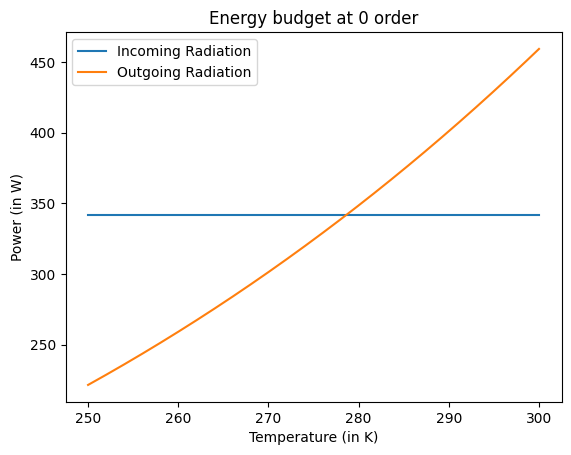

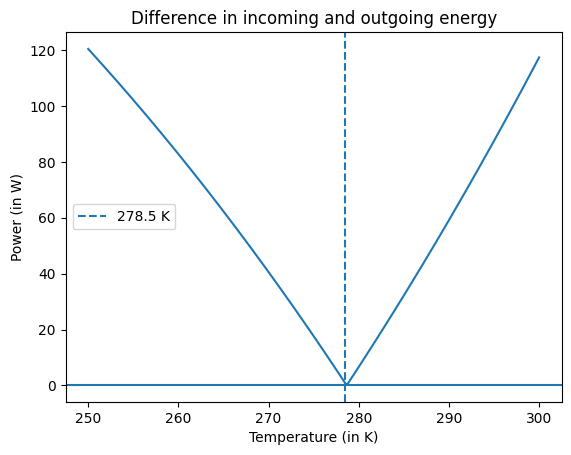

In [ ]:
# Answer here
T = np.linspace(250, 300, 400)
plt.plot(T, np.ones(len(T)) *IncomingRadiationPerSquareMeter(), label = 'Incoming Radiation')
plt.plot(T, OutgoingRadiationPerSquareMeter(T), label = 'Outgoing Radiation')
plt.xlabel('Temperature (in K)')
plt.ylabel('Power (in W)')
plt.plot()
plt.legend()
plt.title('Energy budget at 0 order')
plt.show()


plt.plot(T, np.abs(OutgoingRadiationPerSquareMeter(T) - np.ones(len(T)) * IncomingRadiationPerSquareMeter()))
plt.title('Difference in incoming and outgoing energy')
plt.xlabel('Temperature (in K)')
plt.ylabel('Power (in W)')
plt.axhline(0)
plt.axvline(278.5, linestyle = '--',label = '278.5 K')
plt.legend()

In [ ]:
def diff(T):
  return np.abs(OutgoingRadiationPerSquareMeter(T) - np.ones(len(T)) * IncomingRadiationPerSquareMeter())
opt=scipy.optimize.minimize(diff,[10],method='COBYLA',bounds=[(0,300)])
print('Predicted Earth temperature:',opt.x[0] - 273, 'degree celsius')
print('Difference between predicted and current temperature', 15 - opt.x[0] + 273, 'degrees celsius')

Predicted Earth temperature: 5.662897656249925 degree celsius
Difference between predicted and current temperature 9.337102343750075 degrees celsius


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b. The temperature of Earth with air and clouds

It turns out that we didn't find the correct temperature.  We have ignored two important effects.

**Albedo**  

Some fraction of the radiation that is incoming to the Earth simply gets reflected back immediately from things like clouds and ice.  This fraction is approximately $\alpha=0.3$.  The incoming radiation per square meter is then instead $\frac{S}{4}( 1-\alpha)$.


**Greenhouse Gases**

In practice, some fraction of the radiation that would typically be radiated back into space is capture by the greenhouse gases in the atmosphere.

We can represent this by including an emissivity term for the atmosphere writing instead that the radiation emitted is $\epsilon \sigma T^4$.  We don't have any good way to calculate $\epsilon$ from first principles at the moment so instead let's back it out.  Let's instead say that the pre-industrial temperature is 14 celsius.  Calculate using your code what the emissivity have to be?



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### Answer Here
S = 1367.6
sigma = 5.67 * 10**-8
alpha = 0.3
T_earth = 273.15 + 14
epsilon = (S * (1 - alpha)) / (4 * sigma * T_earth**4)
print('The emissivity of the Earth would have to be', epsilon)


The emissivity of the Earth would have to be 0.6208387265822015


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c. Linearizing around the equilibrium

We will find it convenient to linearize are outgoing radiation around zero degrees celsius.  This should give us

$$\epsilon \sigma (T_0 + T_c)^4 \approx \epsilon \sigma(T_0^4 + 4 T_0^3 T_c) = A + BT_c$$
where $T_0=273.15$ and $T_c$ is the temperature in Celsius.

This gives us $A=195.94$ and $B=2.87$.

Change your outgoing radiation function to use $A+BT_c$.  Your function should take $T$ in Kelvin but needs to convert it to Celsius to work here.

Again, optimize for the equilibrium temperature.  You'll actually find that we get a temperature $T=15.11878309$.  This is off because the linearization wasn't great.  We can fix this by instead renormalizing these parameters instead using
* $A=221.2$
* $B=1.3$

Check that these new parameters give a much closer equilbrium temperature (for the pre-industrial average) of 13.94


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### Answer Here
params = dict()
params['A'] = 195.94
params['B'] = 2.87
params['alpha'] = 0.3
params['S'] = 1367.6
params['epsilon'] = epsilon

def IncomingRadiationPerSquareMeter(params):
  return (params['S'] * (1 - params['alpha'])) / 4

def OutgoingRadiationPerSquareMeter(params, T):
  Tc = T - 273.15
  A = params['A']
  B = params['B']
  return A + B * Tc


def DiffModified(T):
  return np.abs(IncomingRadiationPerSquareMeter(params) - OutgoingRadiationPerSquareMeter(params, T))

opt=scipy.optimize.minimize(DiffModified,[10],method='COBYLA',bounds=[(0,300)])
print('Predicted Earth temperature (slightly wrong):',opt.x[0] - 273, 'degree celsius')

params['A'] = 221.2
params['B'] = 1.3

opt=scipy.optimize.minimize(DiffModified,[10],method='COBYLA',bounds=[(0,300)])
print('Predicted Earth temperature (better optimized):',opt.x[0] - 273, 'degree celsius')


Predicted Earth temperature (slightly wrong): 15.26835468750005 degree celsius
Predicted Earth temperature (better optimized): 14.096091406250025 degree celsius


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>


We will be building up a dictionary with the relevant parameters in it - so far
```
params = {
    'alpha' : 0.3,
    'A' : 221.2  ,
    'B' : 1.3
    }
```


### d. Global Warming

We know that putting carbon dioxide in the atmosphere increases the temperature of the Earth.  We would like to quantify this.  It is known that Carbox dioxide essentially contributes to decreasing the radiation which is emitted from the Earth in a way which is logarithmic to its concentration.  In other words, it corrects our emitted radiation by a term
$$ r \log \left(\frac{CO_{2;current}}{CO_{2;old}}\right) $$
where $r=-5$ is a proportionality constant.  

Below is the Carbon dioxide that is in the air as a function of year.  Plot it:

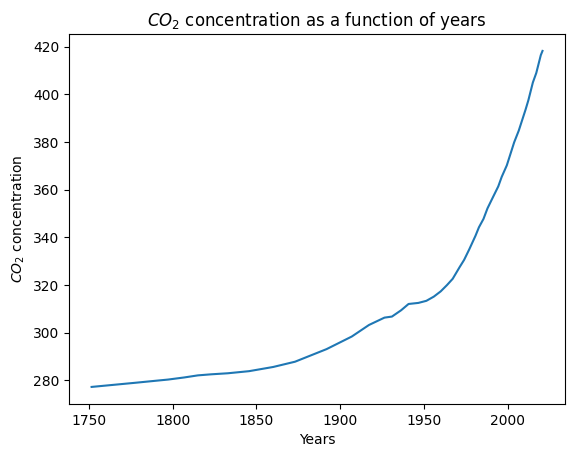

In [ ]:
CO2=np.array([[1751.590620307266, 277.1900826446281],
[1777.9960515400046, 278.95316804407713],
[1790.6841547040233, 279.8347107438017],
[1797.1997437701493, 280.27548209366387],
[1806.8001722200638, 281.1570247933884],
[1815.0283007970431, 282.03856749311296],
[1822.9161897361043, 282.4793388429752],
[1832.8625284845687, 282.92011019283746],
[1845.5506316485873, 283.80165289256195],
[1859.9484389931429, 285.56473829201104],
[1872.9711111344473, 287.7685950413223],
[1891.8062104235146, 293.0578512396694],
[1906.8674850620098, 298.3471074380165],
[1917.128545475548, 303.1955922865013],
[1926.3717223056487, 306.2809917355372],
[1930.8288615623721, 306.72176308539946],
[1936.3010490722172, 309.366391184573],
[1940.7440116773605, 312.0110192837465],
[1946.573450807019, 312.45179063360877],
[1951.3708297016603, 313.3333333333333],
[1955.8194629674358, 315.09641873278235],
[1959.9221859346617, 317.30027548209364],
[1963.6789986033375, 319.9449035812672],
[1967.0927363037795, 322.58953168044076],
[1971.1784472891093, 327.4380165289256],
[1973.903199722768, 330.52341597796146],
[1976.9625211337122, 334.93112947658403],
[1980.6994864901762, 340.6611570247934],
[1982.735253657051, 344.1873278236915],
[1985.4571707603936, 347.71349862258955],
[1987.8303422348704, 352.1212121212121],
[1990.8896636458148, 356.5289256198347],
[1994.2892246946772, 361.37741046831957],
[1996.322156531236, 365.3443526170799],
[1999.3786426118645, 370.1928374655647],
[2003.7762399319522, 379.88980716253445],
[2006.4896510443468, 384.73829201101927],
[2010.5498440568329, 393.55371900826447],
[2012.2397009251579, 397.5206611570248],
[2014.9361000556567, 405.0137741046832],
[2016.9690318922155, 408.9807162534435],
[2019.6654310227143, 416.4738292011019],
[2020.6833146061517, 418.23691460055096]])

### Plot Here
plt.title(r'$CO_2$ concentration as a function of years')
plt.xlabel('Years')
plt.ylabel(r'$CO_2$ concentration')
plt.plot(CO2[:,0], CO2[:,1])

Now, modify your code to include this additional forcing term into the emitted radiation.  

Compute the equilibrium temperature at the value of carbon dioxide for each year and graph this equilibrium temperature against the year.  Plot it on top of the actual measured temperature which is in `tempData[:,1]` (where the uear is in `tempData[:,0]`).   Notice the close agreement between the predicted temperature based on the CO2 and our 0D EBM vs the actual temperature (actually the prediction is probably closer then it should be expected given the spherical cow nature of our approximation)

```
params = {
    'alpha' : 0.3,
    'A' : 221.2  ,
    'B' : 1.3,
    'r': 5
    'Current_CO2' : ...
    }
```

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

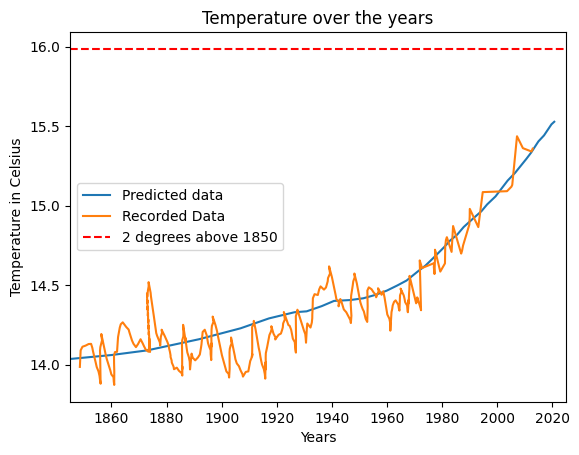

In [ ]:
### Answer HERE
params['r'] = 5
#print(CO2[-1, 1])
# params['Current_CO2'] = CO2[: , 1]
parameter_CO2 = - CO2[:, 1]

def OutgoingRadiationPerSquareMeter(params, T, co2):
  Tc = T
  A = params['A']
  B = params['B']
  return A + B * Tc - params['r'] * np.log(co2 / CO2[0][1]);


def DiffModified(T, co2):
  return np.abs(IncomingRadiationPerSquareMeter(params) - OutgoingRadiationPerSquareMeter(params, T, co2))
def TempCalculator(CO2):
  predicted = []
  for year, concentration in CO2:
      opt = scipy.optimize.minimize(DiffModified, [10], method = 'COBYLA', bounds = [(0, 300)], args = concentration)
      predicted.append([year, opt.x[0]])
  return predicted
predicted = np.array(TempCalculator(CO2 = CO2))

plt.plot(predicted[:,0], predicted[:, 1], label = 'Predicted data')
plt.plot(tempData[:, 0], tempData[:,1], label = 'Recorded Data')
plt.axhline(tempData[0, 1] + 2, linestyle = '--', color = 'red', label = '2 degrees above 1850')
plt.plot()
plt.title('Temperature over the years')
plt.xlim(1845, 2025)
plt.xlabel('Years')
plt.ylabel('Temperature in Celsius')
plt.legend()

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

Now, in this model, let's compute how much more carbon dioxide we can add to the atmosphere before we can reach two degrees of temperature increase from the 1850 baseline. If we assume that you continue to increase the CO2 in the atmosphere at the same rate that we have been in the last 20 years, what year do we reach a two degree warming.


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

Text(0.5, 1.0, 'Extended $CO_2$ concentration')

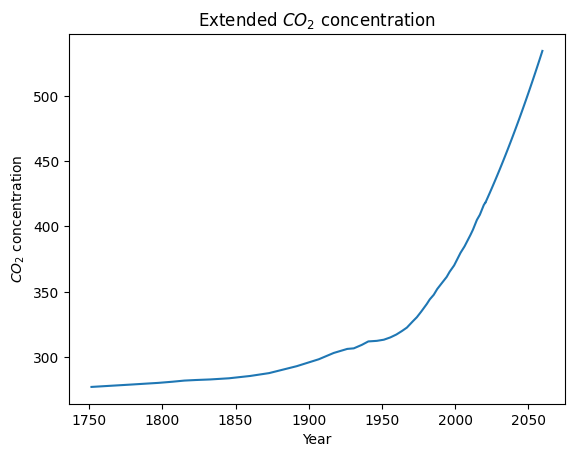

In [ ]:
### Answer Here
temp_1850 = tempData[0, 1]
temp_2degree_warning = temp_1850 + 2

a, b, c=  np.polyfit(CO2[-20:, 0], CO2[-20:, 1], 2)
def fit(t):
  return c + b * t + a * t**2

newCO2 = np.copy(CO2)
newCO2_list = newCO2.tolist()
lastYear = newCO2[-1, 0]

for i in range(40):
  newCO2_list.append([lastYear + i, fit(lastYear + i)])

newCO2_list = np.copy(newCO2_list)
plt.plot(newCO2_list[:, 0], newCO2_list[:, 1])
plt.xlabel('Year')
plt.ylabel(r'$CO_2$ concentration')
plt.title(r'Extended $CO_2$ concentration')

The year when we will hit the warning temperature 2041.0


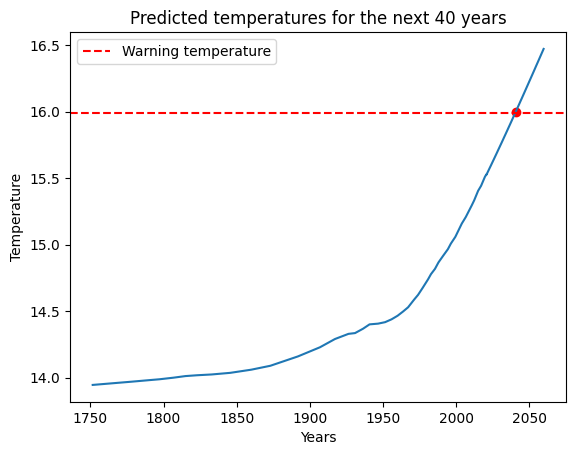

In [ ]:
predictedData = np.array(TempCalculator(newCO2_list))
plt.plot(predictedData[:, 0], predictedData[:, 1])
plt.axhline(temp_2degree_warning, linestyle = '--', color = 'red', label = 'Warning temperature')
plt.title('Predicted temperatures for the next 40 years')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.legend()
warningyear = predictedData[np.where(np.abs(predictedData[:, 1] - temp_2degree_warning) < 1e-1), 0][0, 4]
predictedDoom = np.argwhere(predictedData[:, 0] == warningyear)[0][0]
plt.scatter(predictedData[predictedDoom, 0], predictedData[predictedDoom, 1], color = 'red')
years = np.round(predictedData[np.where(np.abs(predictedData[:, 1] - temp_2degree_warning) < 1e-1), 0][0, 4], 0)
print('The year when we will hit the warning temperature', years)

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Exercise 2: Snowball Earth

### a. Climate Dynamics

So far we've mainly figured out what the equilibrium temperature of the Earth has to be - i.e. the Sun shines on the Earth for a long period of time and eventually it heats the Earth up so that the radiation the Earth is radiating back to space is equivalent to the radiation that is being absorbed.

In this exercise, we are going to start by dealing with the word eventually.  We'd like to understand how long it takes the temperature to approach to equilibrium temperature - this, of course, depends on what we mean by heating up the Earth to that temperature.

It shouldn't surprise us that we to answer this question, we should start by writing down a differential equation that tells us $\partial T / \partial t$ where $T$ is the temperature and $t$ is the time.

$$ C \frac{\partial T}{\partial t} = \frac{S}{4}(1-\alpha) - (A+B T) $$

(remember in $BT$ we need that $T$ is in Celsius).

The r.h.s. of this is just the radiation into the Earth and the radiation out of Earth that we were working on in exercise 1.  Previously, we were just setting this r.h.s. to zero - i.e. we wanted the temperature at which the change in temperature over time was zero.

But when it's not zero, it's telling us how much the temperature changes in a unit of time.  If there is more radiation coming in then going out, we expect that the temperature of the planet should heat up.

The $C$ is the heat capacity of the planet - it's telling us if we put a certain amount of radiation in per second how long does that take to actually heat up the Earth.  If the Earth were a big chunk of iron it would heat up pretty quickly (think a pot). On the other hand, if it was a big chunk of granite, it would heat up quite slowly.  It turns out that Earth (at least the relevant part that's heating up) is essentially a big bag of water - i.e. a big ocean.  It's a little subtle to figure out which part of the ocean is heating up but a reasonable answer here turns out to be the top 10 meters.  In such a case, the heat capacity is going to be $C=4.18130000e+07$.  

Go ahead and set up a first order integrator for this system.  Use a time step $dt$ of 1 month (written in seconds!). You can use `const.seconds_per_month` to get the correct number of seconds.   

Start the temperature of the Earth at 295 degrees Kelvin and allow that temperature to evolve in time.  Plot the temperature as a function of time (in years).

We want to observe three things:
* What is the equilibrium temperature?
* What is the functional form for approaching the equilibrium temperature?
* How long does it take to get there?

Try a similar thing starting from a temperature which is less 270 degrees Kelvin.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

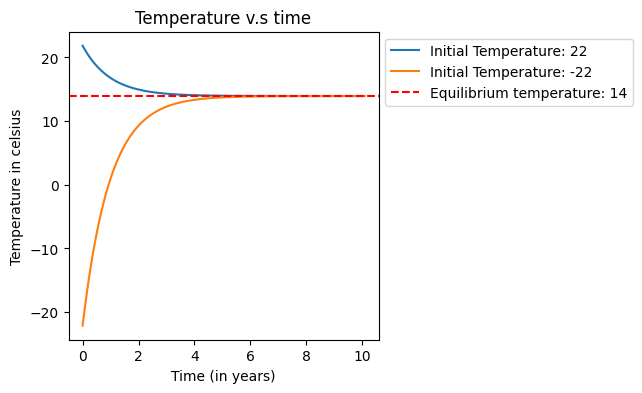

In [ ]:
### Answer Here
#print(params)
def IncomingRadiationPerSquareMeter(params):
  return (params['S'] * (1 - params['alpha'])) / 4

def OutgoingRadiationPerSquareMeter(params, T):
  Tc = T - 273.15
  A = params['A']
  B = params['B']
  return A + B * Tc

def DiffModified(T):
  return (IncomingRadiationPerSquareMeter(params) - OutgoingRadiationPerSquareMeter(params, T))

params['C'] = 4.18130000e+07
params['dt']  = const.seconds_per_month

# Step function
def Step(T):
  return (1 / params['C']) * DiffModified(T)

params['initial_temperature'] = 295
params['Time of evolution'] = 10

# Integrator function
def Integrator(params):
  ts = [0]
  dt = params['dt']
  temp_calculated = []
  T = params['initial_temperature']
  temp_calculated.append(T)
  while ts[-1] <= (params['Time of evolution'] * const.seconds_per_year):
    ts.append(ts[-1] + dt)
    T = T + (Step(T) * dt)
    temp_calculated.append(T)
  return ts, temp_calculated

ts, Ts = Integrator(params)
ts = np.array(ts) / const.seconds_per_year
Ts = np.array(Ts) - 273.15

params['initial_temperature'] = 251
ts1, Ts1 = Integrator(params)
ts1 = np.array(ts1) / const.seconds_per_year
Ts1 = np.array(Ts1) - 273.15
fig, ax = plt.subplots(1,1, figsize = (4,4))
ax.plot(ts, Ts, label = f'Initial Temperature: {295 - 273}')
ax.plot(ts1, Ts1, label = f'Initial Temperature: {251 - 273}')
ax.axhline(14,linestyle = '--', color = 'red', label = 'Equilibrium temperature: 14')
ax.set_title('Temperature v.s time')
ax.set_xlabel('Time (in years)')
ax.set_ylabel('Temperature in celsius')
ax.legend(bbox_to_anchor = (1,1))

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

You should have observed the following things:

* The planet eventually equilibrates to the temperature that you predicted in exercise 1. This is the fixed point of that equation (i.e. if you start there you stay there).

* The approach to that equilibrium is exponential.  You actually could have deduced this even analytically by looking at the form of the differential equation.  This tells you that if you are out of equilibrium that you end up getting pushed back towards the equilibrium temperature relatively quickly (both from above and below). The equilibrium temperature is a stable fixed point - if you push away from it, you flow back to it.

* The time scale to fix a 5 degree difference from equilibrium is on the order of a decade.

It is interesting to ask how long it would take to relax back to the equilibrium temperature if you start 100 degrees Celsius away.

### b. Snowball Earth

We have seen that the Earth is very stable and largely independent of the initial temperature. But we are missing some important qualitiative physics.  In particular, once water gets cold enough it freezes into ice.  This ice is actually much more reflective of the Sun and so the albedo is therefore much higher.  This tells us that we should have the albedo (and hence the radiation entering the planet) depend on temperature.

* If the temperature $T<-10$ degrees celsius, then we should have the albedo be $\alpha_i = 0.5$
* If the temperature $T>10$ degrees celsius, then we should have the albedo be $\alpha_0 = 0.3$
* In the intermediate regime $-10 < T < 10$ we can adjust it continuously as $\alpha_i + (\alpha_0-\alpha_i)(T+10)/20$

Write a function `GetAlpha(T)` which returns the temperature dependent albedo and plot the albedo for temperatures from $-20 < T < 20$ degrees Celsius





<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

Text(0.5, 1.0, 'Albedo as a function of temperature')

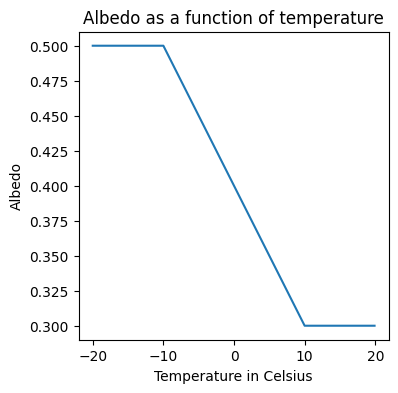

In [ ]:
### Answer Here
def GetAlpha(T):
  if (T < -10 + 273.15):
    alpha = 0.5
  elif(T > 10 + 273.15):
    alpha = 0.3
  else:
    alpha = 0.5 + ((- 0.2) * (T - 273.15 + 10)) / 20
  return alpha

Ts = np.arange(-20 + 273.15, 20 + 273.15, 0.1)
alphas = np.array([GetAlpha(T) for T in Ts])
fig, ax = plt.subplots(1,1, figsize = (4,4))
ax.plot(Ts  - 273.15, alphas)
ax.set_xlabel('Temperature in Celsius')
ax.set_ylabel('Albedo')
ax.set_title('Albedo as a function of temperature')

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

Now we want to incorporate our new temperature dependent albedo in our code.  

What we want to do is loop over a large number of initial temepratures from $T=-50$ to $T=100$ degrees Celsius and then examine what the temperature is as a function of time.

* Plot temperature as a function of time for mamy different initial temperatures (all plotted as a different line).   

* Secondly, for each initial temperature, figure out what the final fixed point temperature is. Plot the fixed point temperature on the y-axis as a function of the initial temperature.  





<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

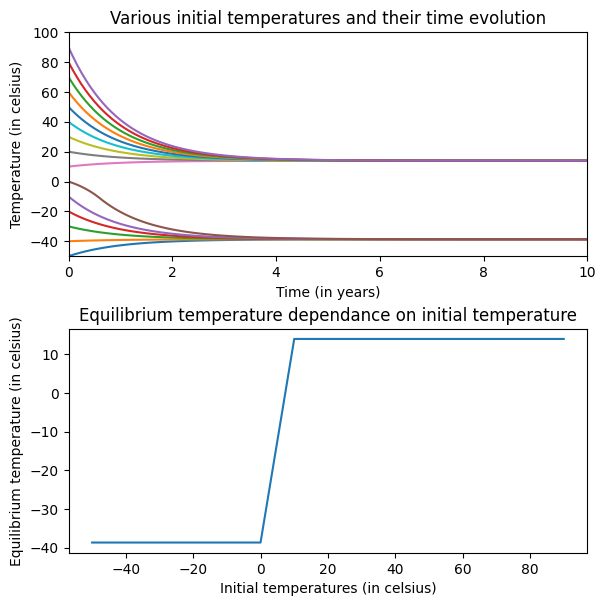

In [ ]:
### Answer Here
def IncomingRadiationPerSquareMeter(params, T):
  return (params['S'] * (1 - GetAlpha(T))) / 4

def OutgoingRadiationPerSquareMeter(params, T):
  Tc = T - 273.15
  A = params['A']
  B = params['B']
  return A + B * Tc

def DiffModified(T):
  return (IncomingRadiationPerSquareMeter(params, T) - OutgoingRadiationPerSquareMeter(params, T))

def StepModified(T):
  return (1 / params['C']) * DiffModified(T)

def IntegratorModified(params):
  ts = [0]
  dt = params['dt']
  temp_calculated = []
  T = params['initial_temperature']
  temp_calculated.append(T)
  while ts[-1] <= (params['Time of evolution'] * const.seconds_per_year):
    ts.append(ts[-1] + dt)
    T = T + (StepModified(T) * dt)
    temp_calculated.append(T)
  return ts, temp_calculated

initial_temperature_range = np.arange(-50 + 273.15, 100 + 273.15, 10)
fixed_points = []
fig, ax = plt.subplots(2,1, figsize = (6,6))
for i in initial_temperature_range:
  params['initial_temperature'] = i
  ts, Ts = IntegratorModified(params)
  ts = np.array(ts) / const.seconds_per_year
  Ts = np.array(Ts) - 273.15
  fixed_points.append(Ts[-1])
  ax[0].plot(ts, Ts)
ax[0].set_xlabel('Time (in years)')
ax[0].set_xlim(0, 10)
ax[0].set_ylabel('Temperature (in celsius)')
ax[0].set_ylim(-50, 100)
ax[0].set_title('Various initial temperatures and their time evolution')

ax[1].plot(initial_temperature_range - 273.15, np.array(fixed_points))
ax[1].set_xlabel('Initial temperatures (in celsius)')
ax[1].set_ylabel('Equilibrium temperature (in celsius)')
ax[1].set_title('Equilibrium temperature dependance on initial temperature')

fig.tight_layout(pad = 0.5)

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

What you should find is two stable fix points (and one unstable fixed point).  The final temperature that the Earth evolves too depends on the initial temperature.  This is coming from negative feedack due to the ice.  Once you get cold enough, you end up with enough ice that causes it to even get colder. And then once you evolve to a sufficiently cold value it is quite hard to recover.

There is some geological evidence that either all (or a very large fraction) of the Earth was covered by glacial ice. This is called the snowball Earth.  

This model gives a mechanism for how such a thing might happen. Consider a scenario where you have a temperature fluctuation for various reasons for a decade;  maybe there is anomolous volcanic activity which puts dust in the atmosphere temporarily raising the albedo or maybe there is a change in the solar insolation because of some orbital oscillation.  Within a decade you might be in a situation which is very hard to recover from.  

### c. Hysteresis

This phenomena is essentially one of Hysteresis.  Let's see this explicitly.  Let's start with a warm planet (10 degrees Celsisus) and the current solar insolation. Now let's do the following:

* for step in range(0,10):
  * Wait 5 years
  * Plot the final temperature vs the current solar insolation
  * Decrease the solar insolation by 5 W/m^2
  

Then do the same thing but in reverse increasing the solar insolation by 5 W/m^2 at each step.  This time do it for 30 steps.    

Both of these line should be on the same plot.  Notice that there is a hystersis.  Even after the solar insolation has gotten back to where it was, you are still not back to your original temperature. In fact, there's essentially no way to get back to your original temperature this way because you need to way overshoot before you melt the planet.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

(11,)


Text(0.5, 1.0, 'Hysteresis curve')

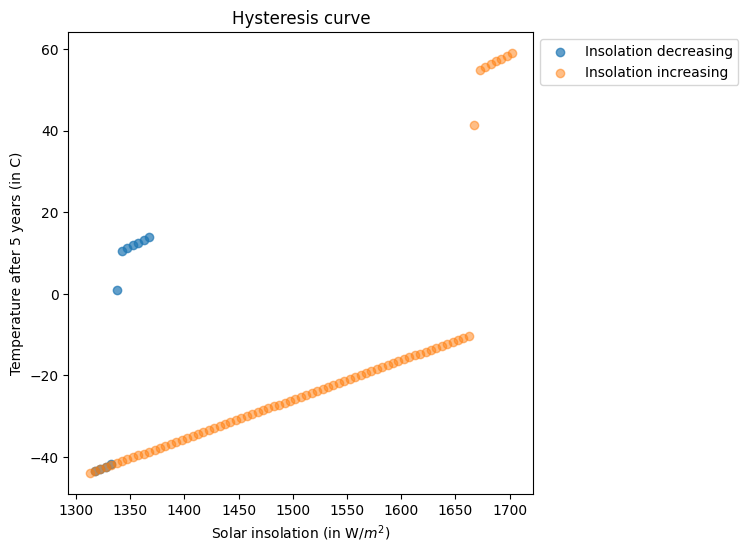

In [ ]:
### Answer Here
def IncomingRadiationPerSquareMeter(params, T):
  return (params['S'] * (1 - GetAlpha(T))) / 4

def OutgoingRadiationPerSquareMeter(params, T):
  Tc = T - 273.15
  A = params['A']
  B = params['B']
  return A + B * Tc

def DiffModified(T):
  return (IncomingRadiationPerSquareMeter(params, T) - OutgoingRadiationPerSquareMeter(params, T))

def StepModified(T):
  return (1 / params['C']) * DiffModified(T)

def IntegratorModified(params):
  ts = [0]
  dt = params['dt']
  temp_calculated = []
  T = params['initial_temperature']
  temp_calculated.append(T)
  while ts[-1] <= (params['Time of evolution'] * const.seconds_per_year):
    ts.append(ts[-1] + dt)
    T = T + (StepModified(T) * dt)
    temp_calculated.append(T)
  return ts, temp_calculated

def Hysteresis(time_of_evolution, initial_temperature):
  params['initial_temperature'] = initial_temperature + const.tempCtoK
  params['Time of evolution'] = time_of_evolution
  params['S'] = 1367.4
  insolation, temperatureDecreasing = [], []
  temperatureIncreasing = []
  for i in range(0, 90):
    _ , Ts = IntegratorModified(params)
    #print(params['S'])
    insolation.append(params['S'])
    params['initial_temperature'] = Ts[-1]

    if i <= 10:
      params['S'] -= 5
      temperatureDecreasing.append(Ts[-1])
    else:
      params['S'] += 5
      temperatureIncreasing.append(Ts[-1])
  return insolation, temperatureDecreasing, temperatureIncreasing
Ss, tD, tI = Hysteresis(5, 10)
fig, ax = plt.subplots(1,1, figsize = (6,6))
print(np.shape(Ss[0:11]))
ax.scatter(np.array(Ss[0: 11]), np.array(tD) - 273.15, alpha = 0.7, label = 'Insolation decreasing')
ax.scatter(Ss[11:], np.array(tI) - 273.15, alpha = 0.5, label = 'Insolation increasing')
ax.legend(bbox_to_anchor = (1,1))
ax.set_ylabel('Temperature after 5 years (in C)')
ax.set_xlabel(r'Solar insolation (in W/$m^2$)')
ax.set_title('Hysteresis curve')

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Exercise 3: One-dimensional EBM

We want to implement a more accurate climate model.  Previously, we had worked on a zero-dimensional model.  To add some realism to this model, we are going to add an additional dimension splitting up the world into different latititudes.  This is the most important effect that we are missing as these different latitudes get significantly different sunlight.  

The energy balance model that we will work with will be

$$ C \frac{dT_s(\phi)}{dt} = (1-\alpha(\phi;T)) Q(\phi) - (A+B T_s(\phi)) + \frac{D}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial T}{\partial \phi} \right)$$



### a. Latitude dependence of solar isolation and albedo


The first thing you should notice is that there are now a lot of different terms that depend on the latitude.

To do that you need to discretize the Earth into a number of different latitude zones.  You could just discretize your own latitudes but because we need to sync our functions with yours, we will give you the latitude zones that you are going to use.  You can get them by calling the following function:
```
def GetLatitudes():
  sfc = climlab.domain.zonal_mean_surface(num_lat=180, water_depth=10.)
  lat = sfc.lat.points
  return lat
```

The first thing that depends on latitude which is important is the amount of radiation from the Sun is being deposited on different parts of the Earth.  We know that the equator gets significantly more sunlight then the poles.  In principle, we should adjust how much each pole gets depending on the season (summer vs winter).  This is an interesting extension you can do but we will start by just assigning an average amount of Sun that touches the different parts of the Earth.  

You can get this by calling the following function

```
def GetInsolation(param):
  model1 = climlab.EBM_annual(name='EBM with interactive ice line',
                            num_lat=180,timestep=const.seconds_per_month,
                            **param)
  Q= np.array([i[0] for i in model1.insolation])
  return Q
```

which will return the amount of watts per square meter of each latitude zone on the Earth.   

We will actually need to send this a set of parameters (which tells us things like the values of differnet coefficients. Here are the parameters we will use (we will explain them in due time))

```
params = {
    'D':0.6,
    'A':210,
    'B':2,
    'a0':0.354,
    'a2':0.25,
    'ai':0.5,
    'Tf':-10.,
    'CO2':283.,
    'C':4.18130000e+07,
    'r':5,
    'timeStep':const.seconds_per_month
    }
```



* Go ahead and plot this as as a function of latitude
* Measure the average radiation on the Earth and verify that it is approximately 1370/4 (the number we were using before). You need to be careful when you do this.  When averaging over a sphere, you need to weight by the volume at that latitude (i.e. $\cos \phi$).  It will behoove you to write a function which takes a array over the latitudes and averages them correctly (we will need this for the average temperature of the planet as well).


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
def GetLatitudes():
  sfc = climlab.domain.zonal_mean_surface(num_lat=180, water_depth=10.)
  lat = sfc.lat.points
  return lat

def GetInsolation(param):
  model1 = climlab.EBM_annual(name='EBM with interactive ice line',
                            num_lat=180,timestep=const.seconds_per_month,
                            **param)
  Q= np.array([i[0] for i in model1.insolation])
  return Q

params = {
    'D':0.6,
    'A':210,
    'B':2,
    'a0':0.354,
    'a2':0.25,
    'ai':0.5,
    'Tf':-10.,
    'CO2':283.,
    'C':4.18130000e+07,
    'r':5,
    'timeStep':const.seconds_per_month
    }


The weighted average of the solar insolation is 341.3486252167457


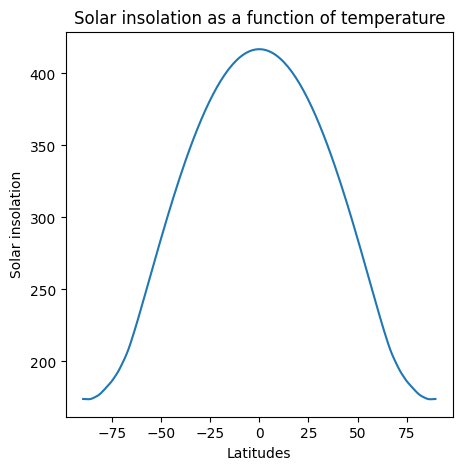

In [ ]:
### Answer Here
lats = GetLatitudes()
insol = GetInsolation(params)

fig, ax = plt.subplots(1,1, figsize = (5,5))
ax.plot(lats, insol)
ax.set_xlabel('Latitudes')
ax.set_ylabel('Solar insolation')
ax.set_title('Solar insolation as a function of temperature')


def mean(arr, weights):
  return np.average(arr, weights = weights)

solarInsolationMean = mean(insol, np.cos(np.deg2rad(lats)))
print('The weighted average of the solar insolation is', solarInsolationMean)

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

The next thing that we need to deal with is the latitude dependence of the albedo.  As we saw in the 0D model, the albedo will change its reflectivity when things freeze.   We are going to do something a little simpler and just have the albedo be $\alpha_0 = 0.354$ (see parameters above) when the temperature $t_f<-10$ Celsius.  

But there is also an effect of the albedo that is coming from the latitude. In particular, because the Sun is shining at more of an angle closer to the poles.  

If the temperature is greater then $-10 < t_f$ then we should have an Albedo of $\alpha_0 + a_2 P_2(\sin \phi)$ where $P_2$ is the second legendre polynomial and can be gotten by doing `legendre.P2(x)`.

We've given you some initial conditions which you can get by doing the following
```
def GetInitial(lat):
  initial = np.array(12. - 40. * legendre.P2(np.sin(np.deg2rad(lat))))+273.15
  return initial
initialTemperature=GetInitial(lat)
```

Go ahead and write a function which generates the Albedo when given an array of temperatures (and the parameters).  Then plot the initial temperature and (separately) what the Albedo looks like for the initialTemperature. Also compute the average of the initial temperature.  Your albedo should have some values at 0.5.



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

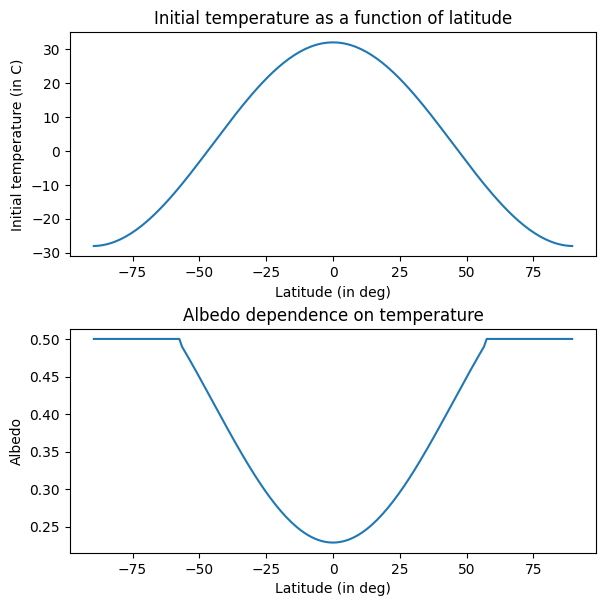

In [ ]:
### Answer Here
def GetInitial(lat):
  initial = np.array(12. - 40. * legendre.P2(np.sin(np.deg2rad(lat)))) + 273.15
  return initial
initialTemperature = GetInitial(lats)

def GetAlpha(T, lat, params):
  alpha = 0
  if T < params['Tf'] + const.tempCtoK:
    alpha = params['ai']
  elif T >= -10 + 273.15:
    alpha = params['a0'] + params['a2'] * legendre.P2(np.sin(np.deg2rad(lat)))
  return alpha


alphas = [GetAlpha(iT, lat, params) for iT, lat in zip(initialTemperature, lats)]

fig, ax = plt.subplots(2,1, figsize = (6,6))
ax[0].plot(lats, initialTemperature - 273.15)
ax[0].set_title('Initial temperature as a function of latitude')
ax[0].set_xlabel('Latitude (in deg)')
ax[0].set_ylabel('Initial temperature (in C)')
ax[1].plot(lats, alphas)
ax[1].set_xlabel('Latitude (in deg)')
ax[1].set_ylabel('Albedo')
ax[1].set_title('Albedo dependence on temperature')
fig.tight_layout(pad = 0.5)


In [ ]:
print('The weighted average of the initial temperature:', mean(initialTemperature, np.cos(np.deg2rad(lats))) + const.tempKtoC, 'degree celsius')

The weighted average of the initial temperature: 11.99949226563433 degree celsius


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b. A diffusion-less planet

We are now in a position to deal with the incoming and outgoing radiation (but not yet the diffusion).  This is implementing the same energy balance that you had previously except that now you are going to simultaneously deal with all the latititudes. Write a function to time evolve this for 100 years.
* Plot the average temperature vs time (getting a point once a year)
* Plot the final temperature profile
* The final temperature difference between the equator and the pole (i.e. just the max - min difference)

You should be running with time steps of 1 month.   



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

Final Temperature difference between equator and the pole 117.25051460516647


Text(0.5, 1.0, 'Average temperature over the years')

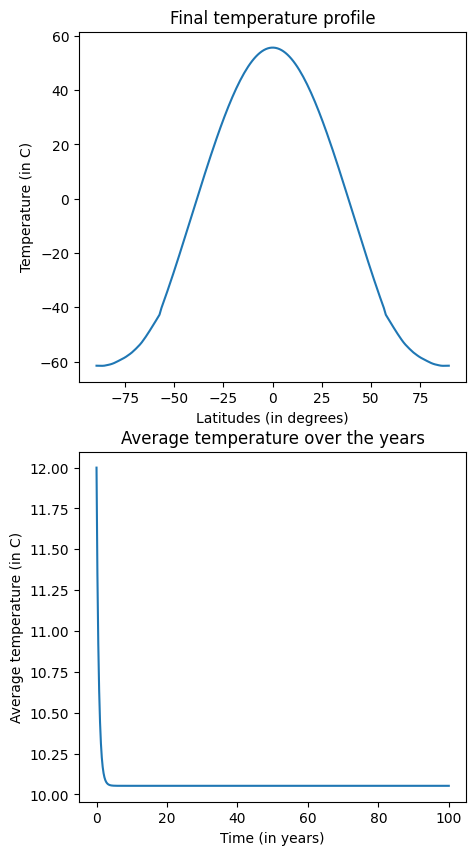

In [ ]:
params['alpha_list'] = alphas
params['insolation_list'] = insol
params['initial_temperature_list'] = initialTemperature
params['total_evolution_time'] = 100
params['lats_weights'] = np.cos(np.deg2rad(lats))
params['latitudes'] = lats

def IncomingRadiationPerSquareMeter(params, T):
  return (1 - np.array(params['alpha_list'])) * np.array(params['insolation_list'])

def OutgoingRadiationPerSquareMeter(params, T):
  return params['A'] + params['B'] * (T + const.tempKtoC)

def DiffV2(T):
  return IncomingRadiationPerSquareMeter(params, T) - OutgoingRadiationPerSquareMeter(params, T)

def StepV2(T):
  return (1 / params['C']) * DiffV2(T)

def IntegratorV2(params):
  ts = [0]
  new_temp = params['initial_temperature_list']
  latitude_weights = params['lats_weights']
  #initialTemperature = params['initialTemperature']
  average_temp = [mean(new_temp, latitude_weights)]
  P = params['total_evolution_time']
  temperature_lats = [np.array(initialTemperature)]
  while ts[-1] < P * const.seconds_per_year:
    new_temp = temperature_lats[-1] + StepV2(new_temp) * params['timeStep']
    temperature_lats.append(np.array(new_temp))
    average_temp.append(mean(new_temp, latitude_weights))
    ts.append(ts[-1] + params['timeStep'])
  return np.array(ts), np.array(temperature_lats), np.array(average_temp)

ts, temperature_lats, average_temp = IntegratorV2(params)

print('Final Temperature difference between equator and the pole', np.max(temperature_lats[-1]) - np.min(temperature_lats[-1]))

fig, ax = plt.subplots(2, 1, figsize = (5, 10))
ax[0].plot(params['latitudes'], temperature_lats[-1] + const.tempKtoC)
ax[0].set_xlabel('Latitudes (in degrees)')
ax[0].set_ylabel('Temperature (in C)')
ax[0].set_title('Final temperature profile')
ax[1].plot(ts / const.seconds_per_year, average_temp + const.tempKtoC)
ax[1].set_xlabel('Time (in years)')
ax[1].set_ylabel('Average temperature (in C)')
ax[1].set_title('Average temperature over the years')


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>


You should get a pretty crazy result in this case. Essentially every latitude is doing its own thing (there are no independent because there is no talking between latitudes).  Thereroe, you're going to see some pretty sharp jumps in the temperature as you change latitudes.  In addition, there is a large (~117 degrees) difference between the poles and the equator.


### c. Diffusion

We are missing an important piece of the physics once we've moved to 1D.  The temperature at different latitudes can interact with each other.  Temperature can move both by diffusion and advection.  Here we are going to concern ourself primarily with diffusion.  We've seen diffusion before in this class but typically as $\partial^2/ \partial x^2$.  In our case though we are on a sphere and need to do something different essentially writing our gradient in spherical coordinates - see the last term of our energy balance model.    

We'd like to go ahead and implement the diffusion just like we've done in previous cases using a finite difference stencil. Unfortunately, this won't work here (we run into numerical instabilities at the poles). What we need to do is use an implicit solver of our differential equations.  This is out of scope for this assignment, so instead we will give you a function you can call
```
def Diffuse(T,params):
  sfc = climlab.domain.zonal_mean_surface(num_lat=180, water_depth=10.)
  Ts = climlab.Field(np.array(T), domain=sfc)
  d = climlab.dynamics.MeridionalHeatDiffusion(name='Diffusion',state=Ts, D=params['D'],timestep=params['timeStep'])
  d.step_forward()
  T=np.squeeze(Ts)
  return T
```
by going
```
T=Diffuse(T,params)
```

This will defuse through a time-step of $\delta T$.  This said, **there is an extra 30 points extra credit if you can right your own diffuse function which does the diffusion correctly without using libraries. You will almost certainly need implicit solvers to do this**.

Go ahead and put everything together now.  You should be calling the diffusion every time-step as well.

* Plot the average temperature vs time (getting a point once a year)
* Plot the final temperature profile
* The final temperature difference between the equator and the pole (i.e. just the max - min difference)
* The ice line: the latitude at which the temperature becomes less then -10.

The diffusion constant $D$ has been tuned to give a reasonable difference between the poles and the Earth.  



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
def Diffuse(T,params):
  sfc = climlab.domain.zonal_mean_surface(num_lat=180, water_depth=10.)
  Ts = climlab.Field(np.array(T), domain=sfc)
  d = climlab.dynamics.MeridionalHeatDiffusion(name='Diffusion',state=Ts, D=params['D'],timestep=params['timeStep'])
  d.step_forward()
  T=np.squeeze(Ts)
  return T

In [ ]:
### Answer Here

def IntegratorV3(params):
  ts = [0]
  new_temp = params['initial_temperature_list']
  latitude_weights = params['lats_weights']
  #initialTemperature = params['initialTemperature']
  average_temp = [mean(new_temp, latitude_weights)]
  P = params['total_evolution_time']
  temperature_lats = [np.array(initialTemperature)]
  while ts[-1] < P * const.seconds_per_year:
    new_temp = temperature_lats[-1] + StepV2(new_temp) * params['timeStep']
    new_temp = Diffuse(new_temp, params)
    temperature_lats.append(np.array(new_temp))
    average_temp.append(mean(new_temp, latitude_weights))
    ts.append(ts[-1] + params['timeStep'])
  return np.array(ts), np.array(temperature_lats), np.array(average_temp)

In [ ]:
ts, temperature_lats, average_temp = IntegratorV3(params)

In [ ]:
# to find the iceline
temperature_lats_c = temperature_lats + const.tempKtoC
idx = np.argmin(temperature_lats_c[-1] < -10)
idx
len(temperature_lats_c[-1])

180

Final Temperature difference between equator and the pole 44.674828582374204


Text(0.5, 1.0, 'Average temperature over the years')

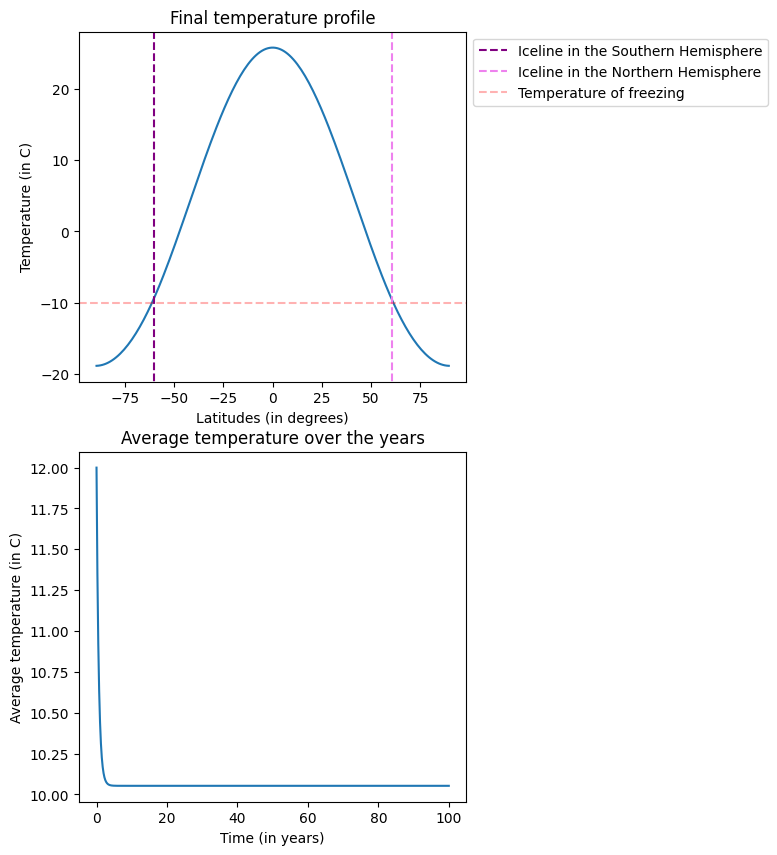

In [ ]:
print('Final Temperature difference between equator and the pole', np.max(temperature_lats[-1]) - np.min(temperature_lats[-1]))

fig, ax = plt.subplots(2, 1, figsize = (5, 10))
ax[0].plot(params['latitudes'], temperature_lats[-1] + const.tempKtoC)
ax[0].axvline(np.array(params['latitudes'])[idx], temperature_lats_c[-1][idx],
              linestyle = '--', color = 'purple', label = 'Iceline in the Southern Hemisphere')
ax[0].axvline(np.array(params['latitudes'])[len(temperature_lats_c[-1]) - idx - 1], temperature_lats_c[-1][len(temperature_lats_c[-1]) - idx + 1],
              linestyle = '--', color = 'violet', label = 'Iceline in the Northern Hemisphere')
ax[0].axhline(-10, linestyle = '--', color = 'red', alpha = 0.3, label = 'Temperature of freezing')
ax[0].set_xlabel('Latitudes (in degrees)')
ax[0].set_ylabel('Temperature (in C)')
ax[0].legend(bbox_to_anchor = (1, 1))
ax[0].set_title('Final temperature profile')
ax[1].plot(ts / const.seconds_per_year, average_temp + const.tempKtoC)
ax[1].set_xlabel('Time (in years)')
ax[1].set_ylabel('Average temperature (in C)')
ax[1].set_title('Average temperature over the years')

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

In [ ]:
!sudo apt-get update << /dev/null
!jupyter nbconvert --to html Climate.ipynb

/bin/bash: line 1: warning: here-document at line 1 delimited by end-of-file (wanted `/dev/null')
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [633 kB]
Get:12 http://secur

You don't have to do this but you can also experiment with various snowball Earth scenarios with this model.